# ENVIRONMENT

In [2]:
%pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn import preprocessing

from sklearn.preprocessing import scale
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score 
from sklearn.model_selection import cross_val_score, train_test_split 

from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


# suppress scientific notation in Pandas
pd.options.display.float_format = "{:.2f}".format
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
pd.set_option("precision", 3)

plt.rcParams["figure.figsize"] = [12, 10]
plt.rcParams["figure.dpi"] = 150

sns.set()
sns.set_context("notebook", rc={"lines.linewidth": 2.5})
sns.set_style("whitegrid")

import warnings

warnings.filterwarnings("ignore")
RANDOM_STATE = 1


In [6]:
df = pd.read_csv("./src/ChurnData/churn_clean.csv")

# Data Exploration
---

In [15]:
df.shape


(10000, 50)

In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [17]:
df.describe()


,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,5000.50,49153.32,38.76,-90.78,9756.56,2.09,53.08,39806.93,10.00,12.02,0.99,0.40,34.53,172.62,3392.34,3.49,3.51,3.49,3.50,3.49,3.50,3.51,3.50
std,2886.90,27532.20,5.44,15.16,14432.70,2.15,20.70,28199.92,2.98,3.03,0.99,0.64,26.44,42.94,2185.29,1.04,1.03,1.03,1.03,1.02,1.03,1.03,1.03
min,1.00,601.00,17.97,-171.69,0.00,0.00,18.00,348.67,0.10,1.00,0.00,0.00,1.00,79.98,155.51,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,2500.75,26292.50,35.34,-97.08,738.00,0.00,35.00,19224.72,8.02,10.00,0.00,0.00,7.92,139.98,1236.47,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00
50%,5000.50,48869.50,39.40,-87.92,2910.50,1.00,53.00,33170.60,10.02,12.00,1.00,0.00,35.43,167.48,3279.54,3.00,4.00,3.00,3.00,3.00,3.00,4.00,3.00
75%,7500.25,71866.50,42.11,-80.09,13168.00,3.00,71.00,53246.17,11.97,14.00,2.00,1.00,61.48,200.73,5586.14,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00
max,10000.00,99929.00,70.64,-65.67,111850.00,10.00,89.00,258900.70,21.21,23.00,7.00,6.00,72.00,290.16,7158.98,7.00,7.00,8.00,7.00,7.00,8.00,7.00,8.00


In [18]:
df.head()


,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25,-133.38,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.98,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.80,172.46,904.54,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.33,-84.24,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.70,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.16,242.63,800.98,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.36,-123.25,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.75,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.75,159.95,2054.71,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.97,-117.25,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.91,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.09,119.96,2164.58,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38,-95.81,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.15,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.67,149.95,271.49,4,4,4,3,4,4,4,5


In [8]:
display(pd.DataFrame(df.isnull().sum(), columns=["# Missing Values"]))

,# Missing Values
CaseOrder,0
Customer_id,0
Interaction,0
UID,0
City,0
State,0
County,0
Zip,0
Lat,0
Lng,0


In [46]:
exploration_df = df.copy()

In [47]:
for col in exploration_df.select_dtypes("object").columns:
    print(f"Converting feature: '{col}' to category datatype")
    exploration_df[col] = exploration_df[col].astype("category")


Converting feature: 'Customer_id' to category datatype
Converting feature: 'Interaction' to category datatype
Converting feature: 'UID' to category datatype
Converting feature: 'City' to category datatype
Converting feature: 'State' to category datatype
Converting feature: 'County' to category datatype
Converting feature: 'Area' to category datatype
Converting feature: 'TimeZone' to category datatype
Converting feature: 'Job' to category datatype
Converting feature: 'Marital' to category datatype
Converting feature: 'Gender' to category datatype
Converting feature: 'Churn' to category datatype
Converting feature: 'Techie' to category datatype
Converting feature: 'Contract' to category datatype
Converting feature: 'Port_modem' to category datatype
Converting feature: 'Tablet' to category datatype
Converting feature: 'InternetService' to category datatype
Converting feature: 'Phone' to category datatype
Converting feature: 'Multiple' to category datatype
Converting feature: 'OnlineSecuri

In [17]:
pd.DataFrame(
    {
        "# missing values": exploration_df.isna().sum(),
        "% missing values": (exploration_df.isna().sum() / len(df)) * 100,
    }
)


,# missing values,% missing values
CaseOrder,0,0.00
Customer_id,0,0.00
Interaction,0,0.00
UID,0,0.00
City,0,0.00
State,0,0.00
County,0,0.00
Zip,0,0.00
Lat,0,0.00
Lng,0,0.00


In [48]:
ctg_columns = [c for c in exploration_df.select_dtypes("category").columns if c not in ['Customer_id', 'Interaction', 'UID', 'City', 'County', 'State', 'Job', 'TimeZone']]

# drop a level for features with < 2 levels
exploration_df = pd.get_dummies(
    exploration_df, columns=ctg_columns, dummy_na=False, drop_first=True, prefix_sep="_"
)

exploration_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,TimeZone,Job,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Area_Suburban,Area_Urban,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,Churn_Yes,Techie_Yes,Contract_One year,Contract_Two Year,Port_modem_Yes,Tablet_Yes,InternetService_Fiber Optic,InternetService_None,Phone_Yes,Multiple_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25,-133.38,38,America/Sitka,Environmental health practitioner,0,68,28561.99,7.98,10,0,1,6.80,172.46,904.54,5,5,5,3,4,4,3,4,0,1,0,0,0,1,1,0,0,0,1,0,1,1,1,0,1,0,1,1,0,0,0,1,1,1,0,0
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.33,-84.24,10446,America/Detroit,"Programmer, multimedia",1,27,21704.77,11.70,12,0,1,1.16,242.63,800.98,3,4,3,3,4,3,4,4,0,1,1,0,0,0,0,0,1,1,0,0,0,1,1,0,1,1,1,0,0,0,1,1,1,0,0,0
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.36,-123.25,3735,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,10.75,9,0,1,15.75,159.95,2054.71,4,4,2,4,4,3,3,3,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.97,-117.25,13863,America/Los_Angeles,Solicitor,1,48,18925.23,14.91,15,2,0,17.09,119.96,2164.58,4,4,4,2,5,4,3,3,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38,-95.81,11352,America/Chicago,Medical illustrator,0,83,40074.19,8.15,16,2,1,1.67,149.95,271.49,4,4,4,3,4,4,4,5,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1


In [49]:
cats_df = exploration_df.select_dtypes("category")

nunique_df = pd.DataFrame(
    {"Unique Values": cats_df.nunique(), "K-1 Levels": cats_df.nunique() - 1}
)

nunique_df

,Unique Values,K-1 Levels
Customer_id,10000,9999
Interaction,10000,9999
UID,10000,9999
City,6058,6057
State,52,51
County,1620,1619
TimeZone,25,24
Job,639,638


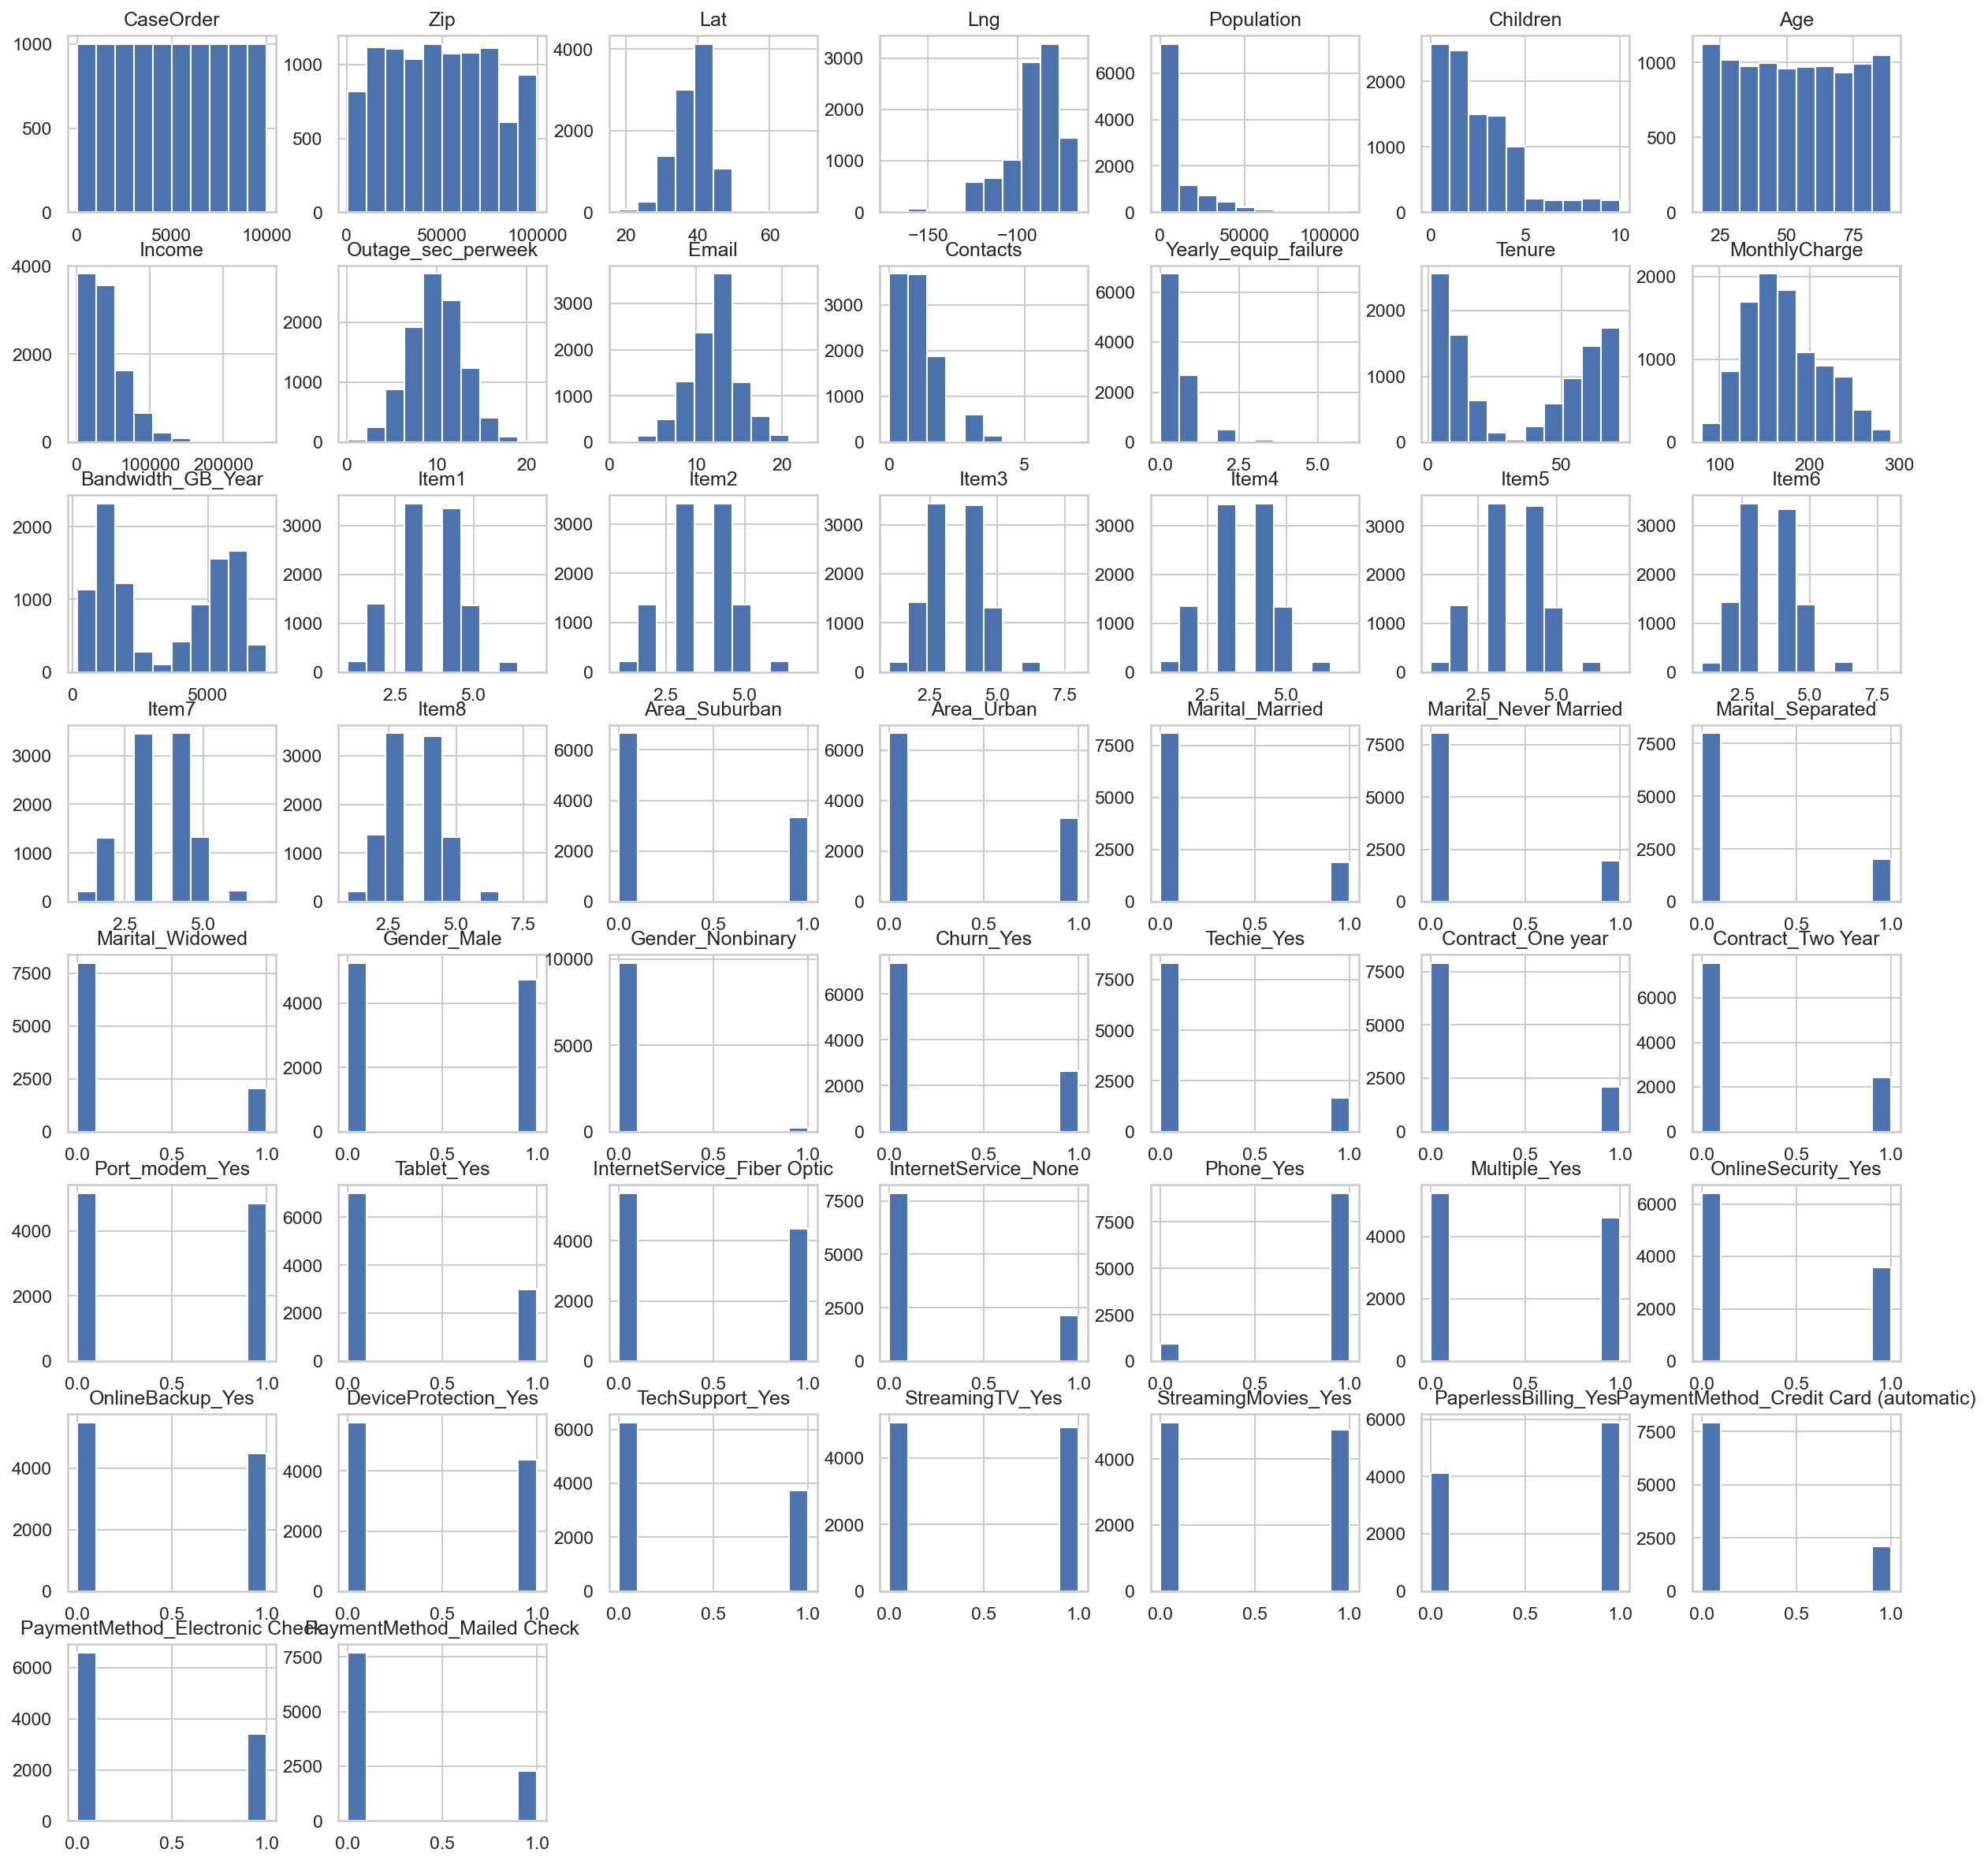

In [50]:
_ = exploration_df.hist(figsize=(20, 20))

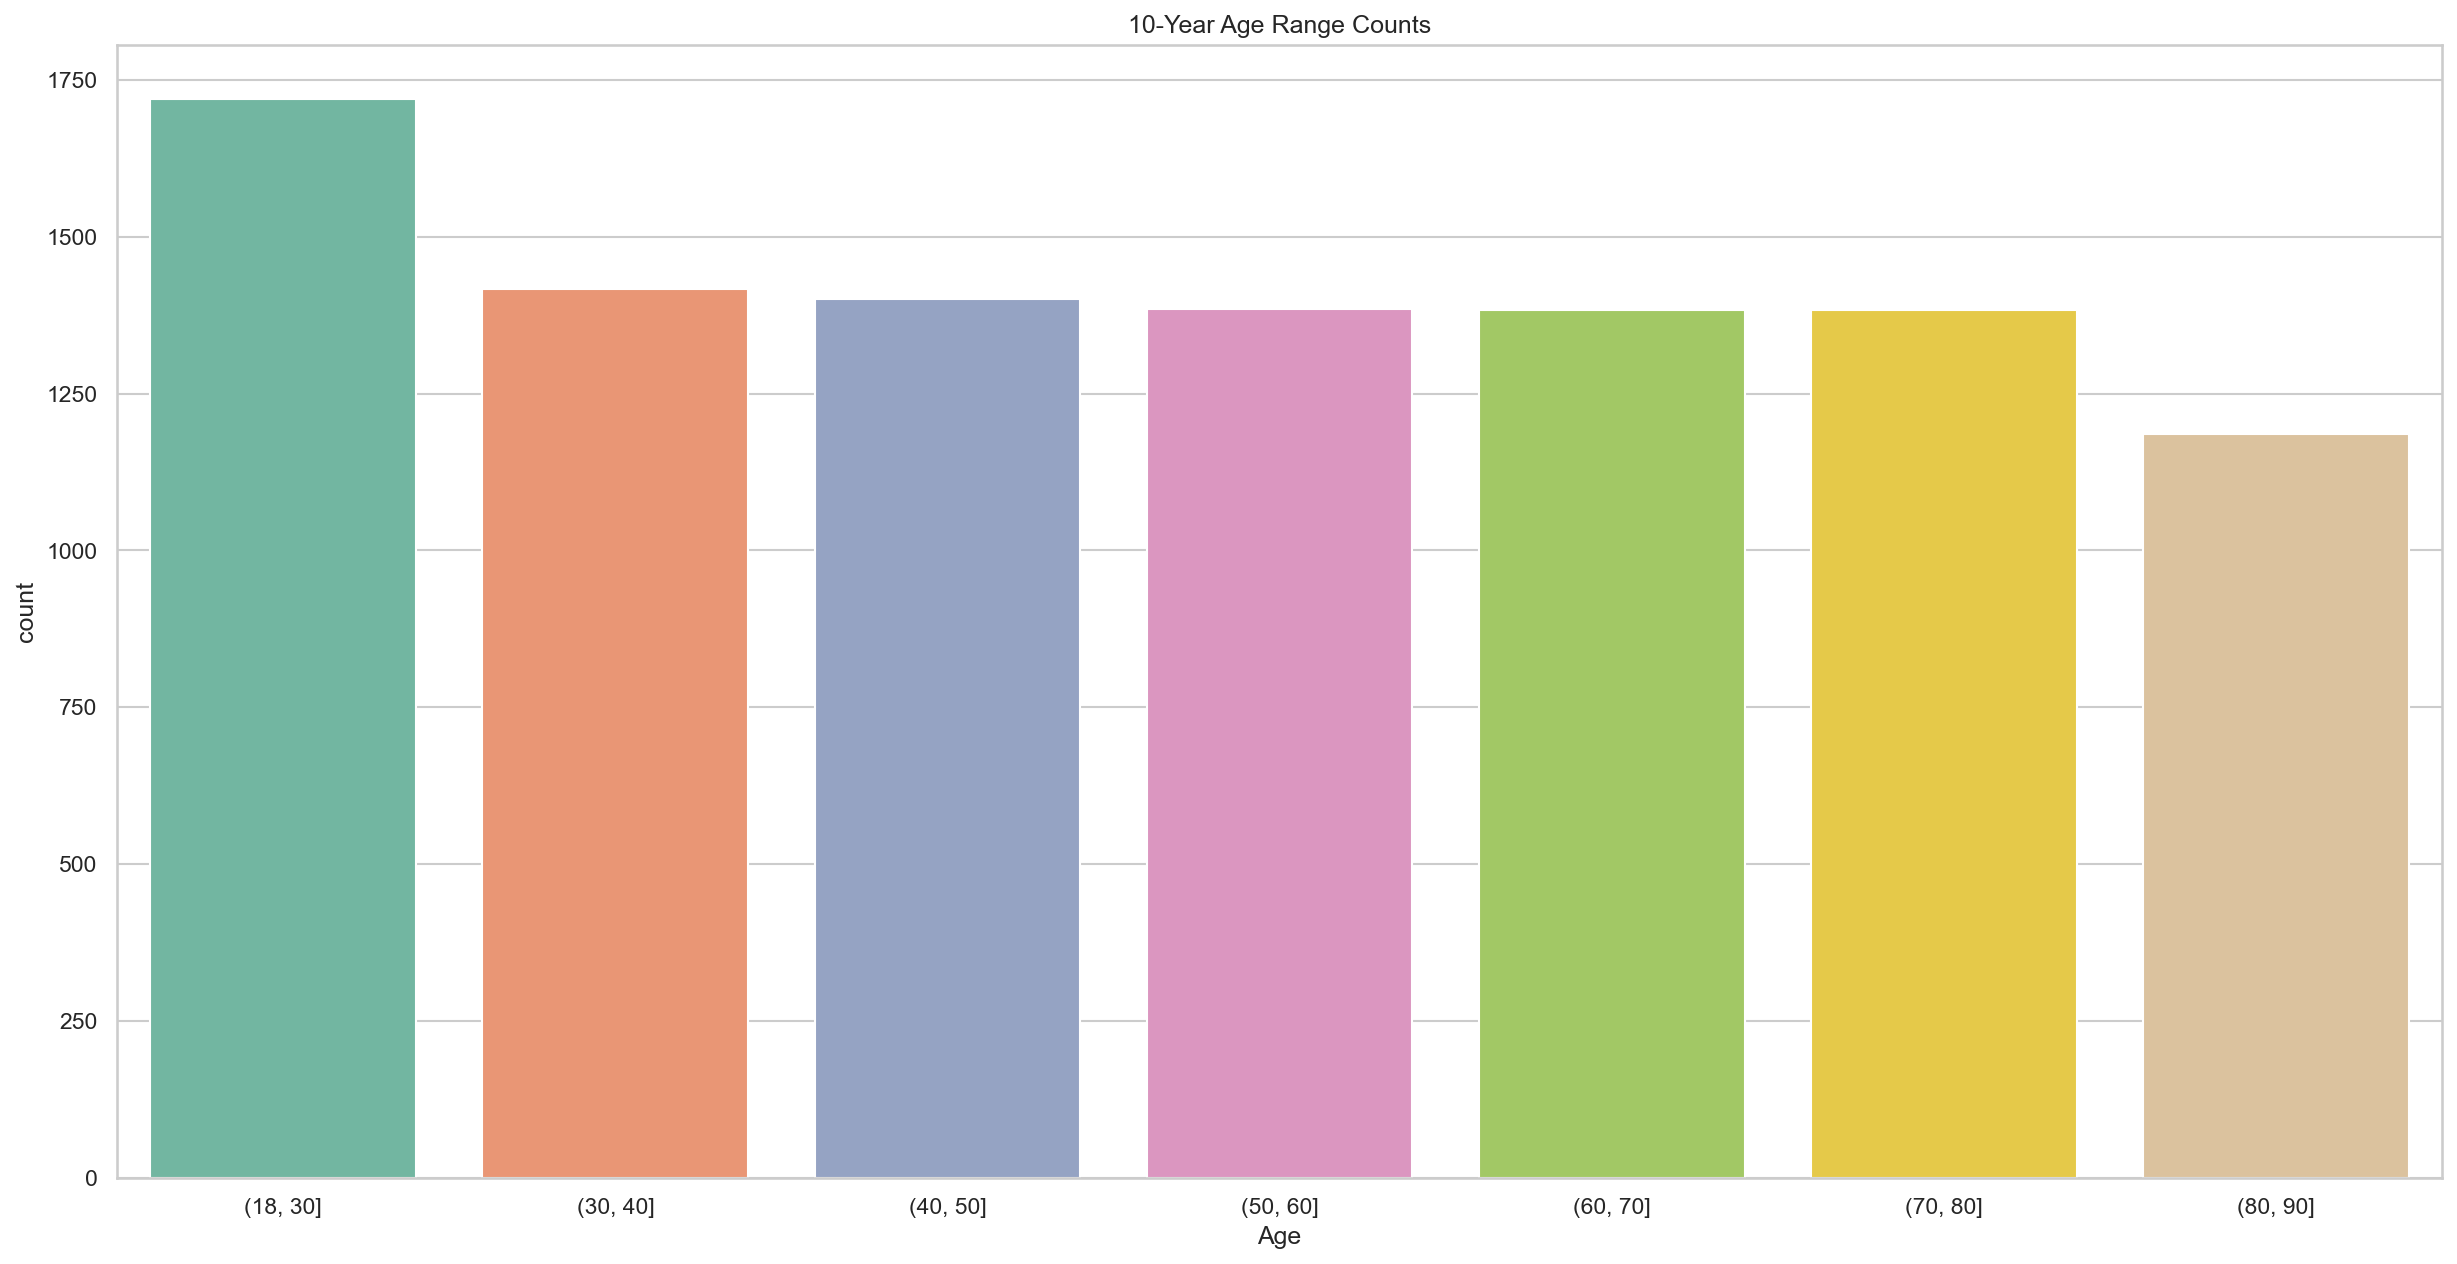

In [52]:
fig, axs = plt.subplots(figsize=(20, 10))

age_bins = pd.cut(exploration_df.Age.round(0), precision=0, bins=[18, *range(30, 91, 10)])

_ = sns.countplot(x=age_bins, palette="Set2").set_title("10-Year Age Range Counts")


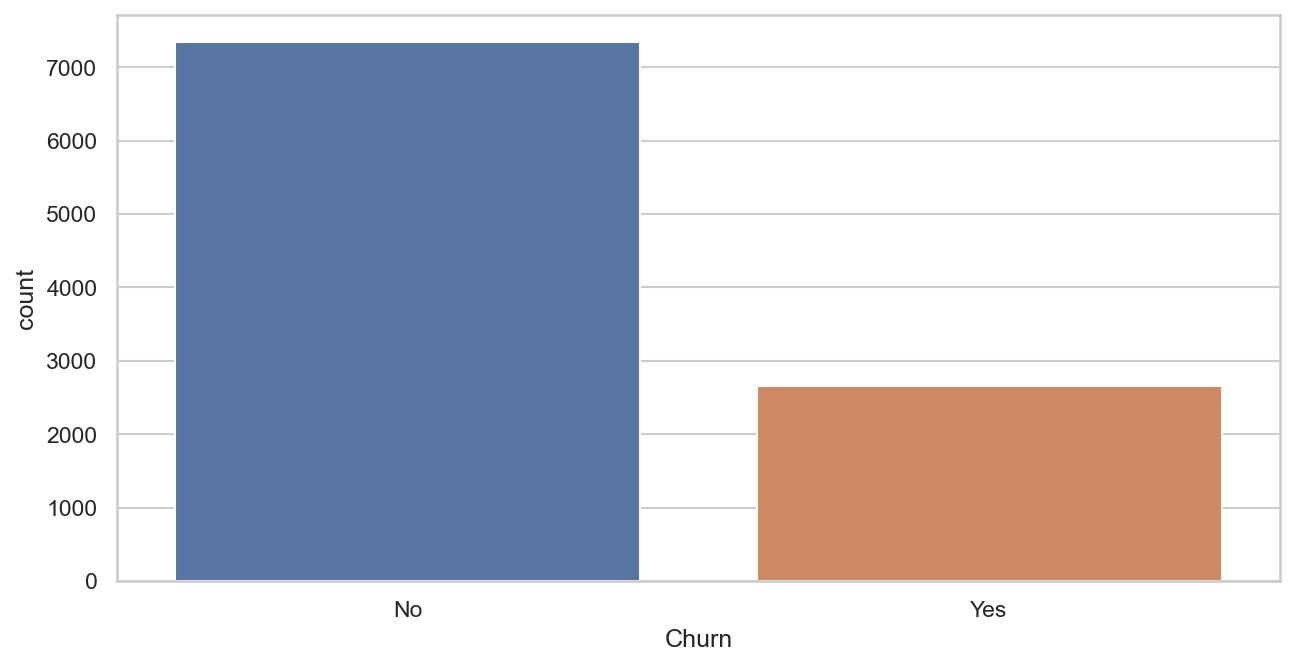

In [59]:
_, ax = plt.subplots(figsize=(10, 5))

sns.countplot(data=df, x=TARGET_VAR)
plt.show()


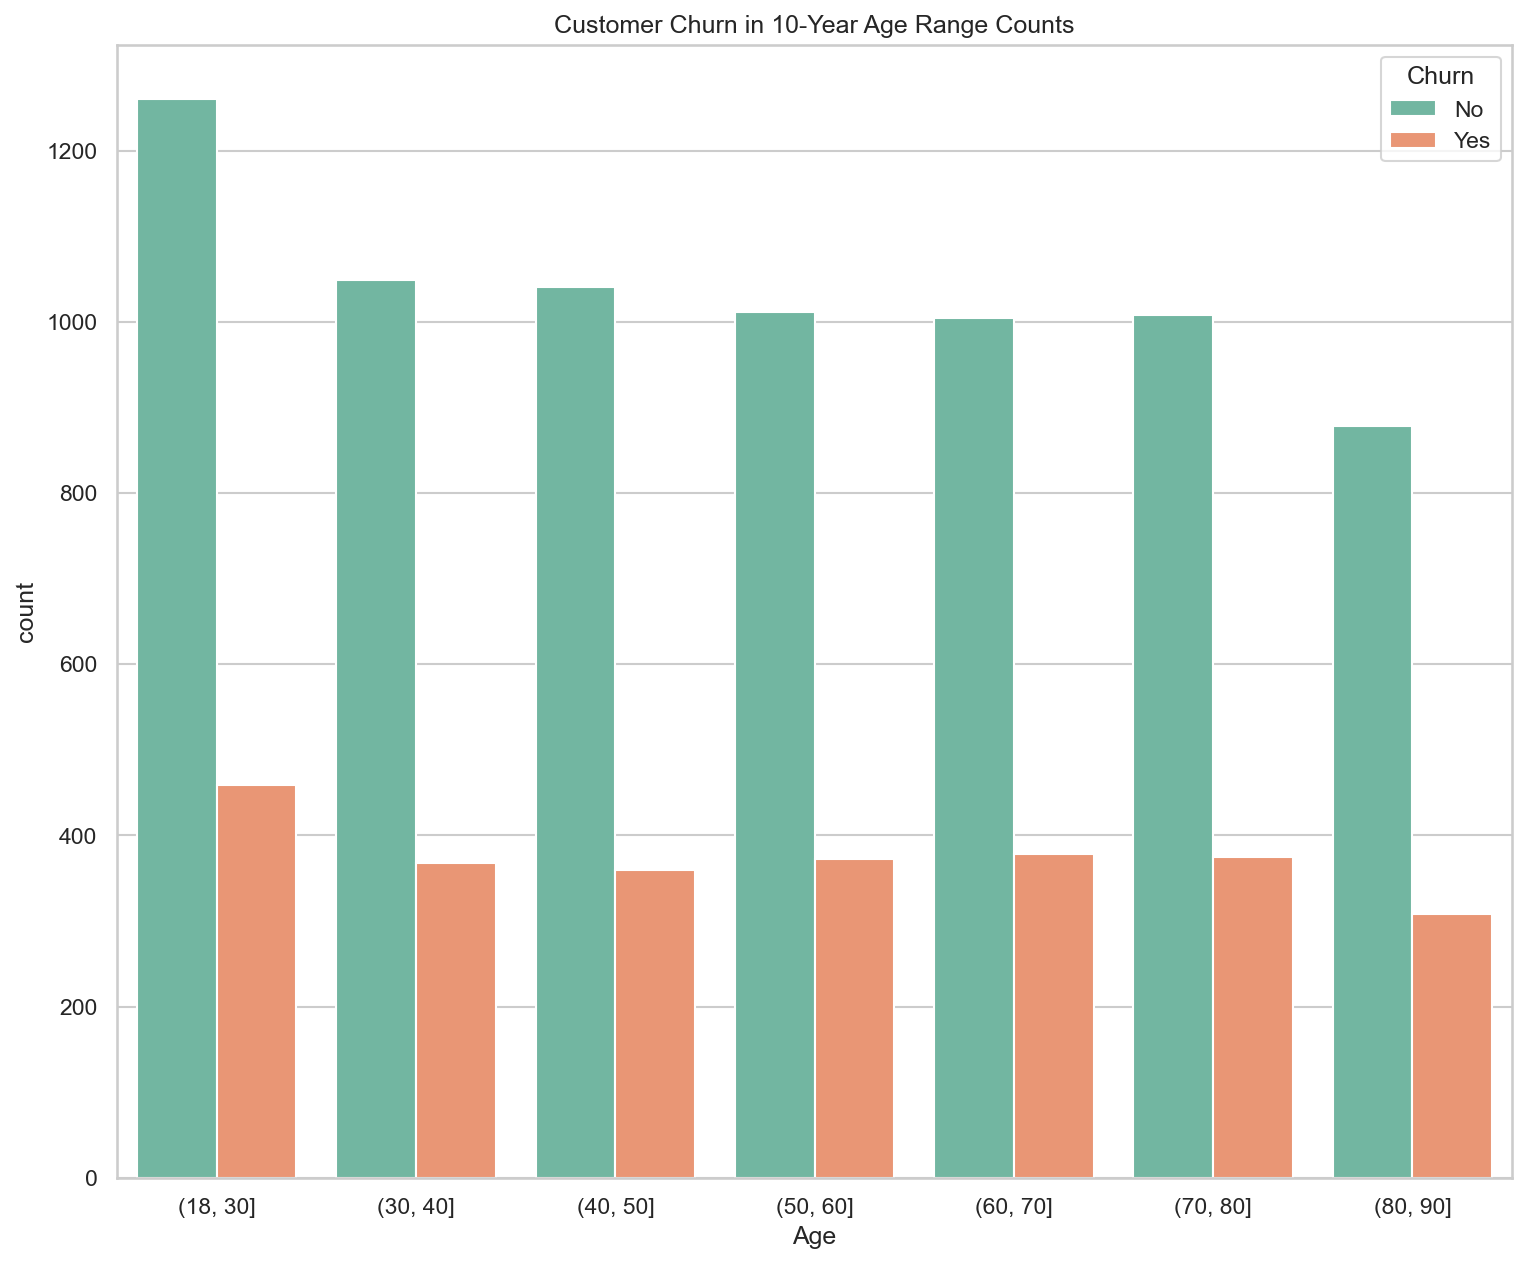

In [61]:
age_bins = pd.cut(exploration_df.Age.round(0), precision=0, bins=[18, *range(30, 91, 10)])

_ = sns.countplot(x=age_bins, hue=TARGET_VAR, palette="Set2", data=df).set_title(
    "Customer Churn in 10-Year Age Range Counts"
)


In [ ]:
ctg_cols = exploration_df.select_dtypes("category").columns
fig, axs = plt.subplots(nrows=len(ctg_cols), figsize=(30, 75))

for i, col in enumerate(ctg_cols):
    sns.countplot(data=exploration_df, x=col,  ax=axs[i])


In [ ]:
exploration_df.info()

# Part I: Research Question 
---

## A.  Describe the purpose of this data mining report by doing the following:



### 1. Propose one question relevant to a real-world organizational situation that you will answer using one of the following classification methods: k-nearest neighbor (KNN), Naive Bayes.
*The submission proposes 1 question that is relevant to a real-world organizational situation, and the proposal includes 1 of the given classification methods.*

- Can we accurately predict if a customer will churn
- Can we accurately predict which customers are at high risk of churn

In [1]:
TARGET_VAR = "Churn"


### 2. Define one goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.
*The submission defines 1 reasonable goal for data analysis that is within the scope of the scenario and is represented in the available data.*

- Using a Classification Model:
- The telecommunications industry is a highly competitive market that sees high annual turnover rates.
- Reduce operating cost by improving customer retention — it costs 10 times more to acquire a new customer than to retain an existing one
- identify high risk customers and offer them incentives or survey's to see how the company can retain/regain their loyalty
- For many providers, retaining highly profitable customers is the number one business goal.
- predict which customers are at high risk of churn To reduce customer churn 

# Part II: Method Justification

---

## B.  Explain the reasons for your chosen classification method from part A1 by doing the following:



### 1.  Explain how the classification method you chose analyzes the selected data set. Include expected outcomes.
*The submission logically explains how the chosen classification method analyzes the selected data set and includes accurate expected outcomes.*

- https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
    - "In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor."
- https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761
    - "A classification problem has a discrete value as its output."
    - "relies on labeled input data to learn a function that produces an appropriate output when given new unlabeled data."  
    - "The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification"    
    - "The KNN algorithm assumes that similar things exist in close proximity."
- https://builtin.com/data-science/supervised-machine-learning-classification
    - "In supervised learning, algorithms learn from labeled data. After understanding the data, the algorithm determines which label should be given to new data by associating patterns to the unlabeled new data."
    - "Classification is a technique for determining which class the dependent belongs to based on one or more independent variables."
    - "K-NN algorithm is one of the simplest classification algorithms and it is used to identify the data points that are separated into several classes to predict the classification of a new sample point. K-NN is a non-parametric, lazy learning algorithm. It classifies new cases based on a similarity measure (i.e., distance functions)."
- https://www.geeksforgeeks.org/regression-classification-supervised-machine-learning/
    - "A classification problem is when the output variable is a category,"
    - "In short Classification either predicts categorical class labels or classifies data (construct a model) based on the training set and the values (class labels) in classifying attributes and uses it in classifying new data."
    

### 2.  Summarize one assumption of the chosen classification method.
*The submission adequately summarizes 1 assumption of the chosen classification method.*

- https://learn.g2.com/k-nearest-neighbor
    - "One of the most significant advantages of using the KNN algorithm is that there's no need to build a model or tune several parameters. Since it's a lazy learning algorithm and not an eager learner, there's no need to train the model; instead, all data points are used at the time of prediction. Of course, that's computationally expensive and time-consuming."
    - "When you have massive amounts of data at hand, it can be quite challenging to extract quick and straightforward information from it."
    - "If data has too many features, then there's a high risk of overfitting the model, leading to inaccurate models. Too many dimensions also make it harder to group data as every data sample in the dataset will appear equidistant from each other."
    - "The k-nearest neighbors algorithm is highly susceptible to overfitting due to the curse of dimensionality"
    - "KNN doesn't work well if there are too many features. Hence, dimensionality reduction techniques like principal component analysis (PCA) and feature selection must be performed during the data preparation phase."
    
- https://medium.com/machine-learning-101/k-nearest-neighbors-classifier-1c1ff404d265
    - "An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor."
    
- https://www.datacamp.com/tutorial/preprocessing-in-data-science-part-1-centering-scaling-and-knn
    - "Any algorithm, such as k-NN, which cares about the distance between data points, may thus focus squarely and unfairly on variables with a larger range, such as 'free sulfur dioxide', a variable that may contain only noise, for all we know. This motivates scaling our data,"
    - "There are a number of performance measures for classification challenges. It is of the utmost importance to realise that the choice of performance measure is deeply domain & question specific. In the case of a dataset with balanced classes (where all target values are ~ equally represented), data scientists commonly look at accuracy as a performance measure. "
    - "Before running a model, such as regression (predicting a continuous variable) or classification (predicting a discrete variable), on data, you almost always want to do some preprocessing. For numerical variables, it is common to either normalize or standardize your data. What do these terms mean?"
    - "The two main reasons for scaling your data are: Your predictor variables may have significantly different ranges and, in certain situations, such as when implementing k-NN, this needs to be mitigated so that certain features do not dominate the algorithm; You want your features to be unit-independent, that is, not reliant on the scale of the measurement involved: for example, you could have a measured feature expressed in meters and I could have the same feature expressed in centimeters. If we both scale our respective data, this feature will be the same for each of us"

### 3.  List the packages or libraries you have chosen for Python or R, and justify how each item on the list supports the analysis.
*The submission lists the packages or libraries chosen for Python or R and justifies how each item on the list supports the analysis.*

We'll use several tools and technologies to support the logistic regression analysis. The primary tools we'll discuss are Imbalanced-learn, Jupyter Notebooks, NumPy, Matplotlib, Pandas, Python, Seaborn, Scikit-Learn,. 

Imbalanced-learn provides functions to deal with classification with imbalanced classes. Our dependent variable is an imbalanced class, so we'll use this library to balance the dataset.

Jupyter Notebooks is beneficial because it offers seamless integration of python, data visualizations, and text documentation. Ultimately this offers human-readable and executable documents used to perform data analysis (Ingargiola, A., & contributors, 2015).

NumPy is beneficial because it serves as the de-facto Python Numerical programming package. NumPy is easy to use, offers extensive computing tools, and is optimized to work well on large data sets.

Matplotlib is a comprehensive library for creating visualizations in Python. Matplotlib offers a diverse set of visualization offers, but we're mainly going to leverage its plotting functionality to better understand our data set and evaluate the model.

Pandas' manipulation and analysis functions are immensely beneficial. More specifically, it provides a user-friendly API for interacting with, manipulating, and performing operations on various data structures and tabular data (Pandas, 2022).

I'm familiar with Python and currently use it every day at work. I’m familiar with the programming ecosystem, its libraries, and its tools.

Scikit-learn is a machine learning library that provides tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities (scikit-learn developers, 2021). We'll use this package's modules to create a linear regression model, select independent variables and standardize the data.

# Part III: Data Preparation


---

## C.  Perform data preparation for the chosen data set by doing the following:

### 1.  Describe one data preprocessing goal relevant to the classification method from part A1.
*The submission describes 1 data preprocessing goal that is relevant to the classification method from part A1.*


In [4]:
original_df = pd.read_csv("./src/ChurnData/churn_clean.csv")

#### Data Preprocessing Goals

##### Drop Irrelevant Columns

##### Impute Missing Values

##### Convert Object to Categorical Datatype

##### Correct Feature Skew

##### Sort Features Alphabetically

##### Separate Dependent and Independent Variables

##### Standardize Numeric Variables 

##### Splitting Data (Train/Test)

##### Standardize Numeric Variables 

##### Standardize Numeric Variables 

### 2.  Identify the initial data set variables that you will use to perform the analysis for the classification question from part A1, and classify each variable as continuous or categorical.
*The submission identifies the data set variables used to perform the analysis for the classification question from part A1, and the submission accurately classifies each variable as continuous or categorical.*


### 3.  Explain each of the steps used to prepare the data for the analysis. Identify the code segment for each step.
*The submission accurately explains each step used to prepare the data for analysis, and the submission identifies an accurate code segment for each step.*


##### Drop Irrelevant Columns

##### Impute Missing Values

##### Convert Object to Categorical Datatype

##### Correct Feature Skew

##### Sort Features Alphabetically

##### Separate Dependent and Independent Variables

##### Standardize Numeric Variables 

##### Splitting Data (Train/Test)

##### Standardize Numeric Variables 

##### Standardize Numeric Variables 

In [ ]:
# EDA
plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In [ ]:
# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

steps = [
    ('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Specify the hyperparameter space
param_grid = {'knn__n_neighbors': np.arange(1, 9),
              'knn__weights': ['uniform', 'distance'],
              'knn__leaf_size': [30],
              'knn__n_jobs': [-1],
             }

# {'algorithm': 'auto',
#  'leaf_size': 30,
#  'metric': 'minkowski',
#  'metric_params': None,
#  'n_jobs': 1,
#  'n_neighbors': 5,
#  'p': 2,
#  'weights': 'uniform'}


# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=RANDOM_STATE)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, param_grid=param_grid, cv=5)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# # Predict and print the label for the new data point X_new
# new_prediction = knn.predict(X_new)
# print("Prediction: {}".format(new_prediction))

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))


In [ ]:
# measure model performance

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

In [ ]:
# visualize model accuracy of test vs training data using different n_neighbords

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


### 4.  Provide a copy of the cleaned data set.
*The submission includes an accurate copy of the cleaned data set.*

# Part IV: Analysis


---

## D.  Perform the data analysis and report on the results by doing the following:



### 1.  Split the data into training and test data sets and provide the file(s).
*The submission provides reasonably proportioned training and test data sets.*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
# write test and train to sep CSVs

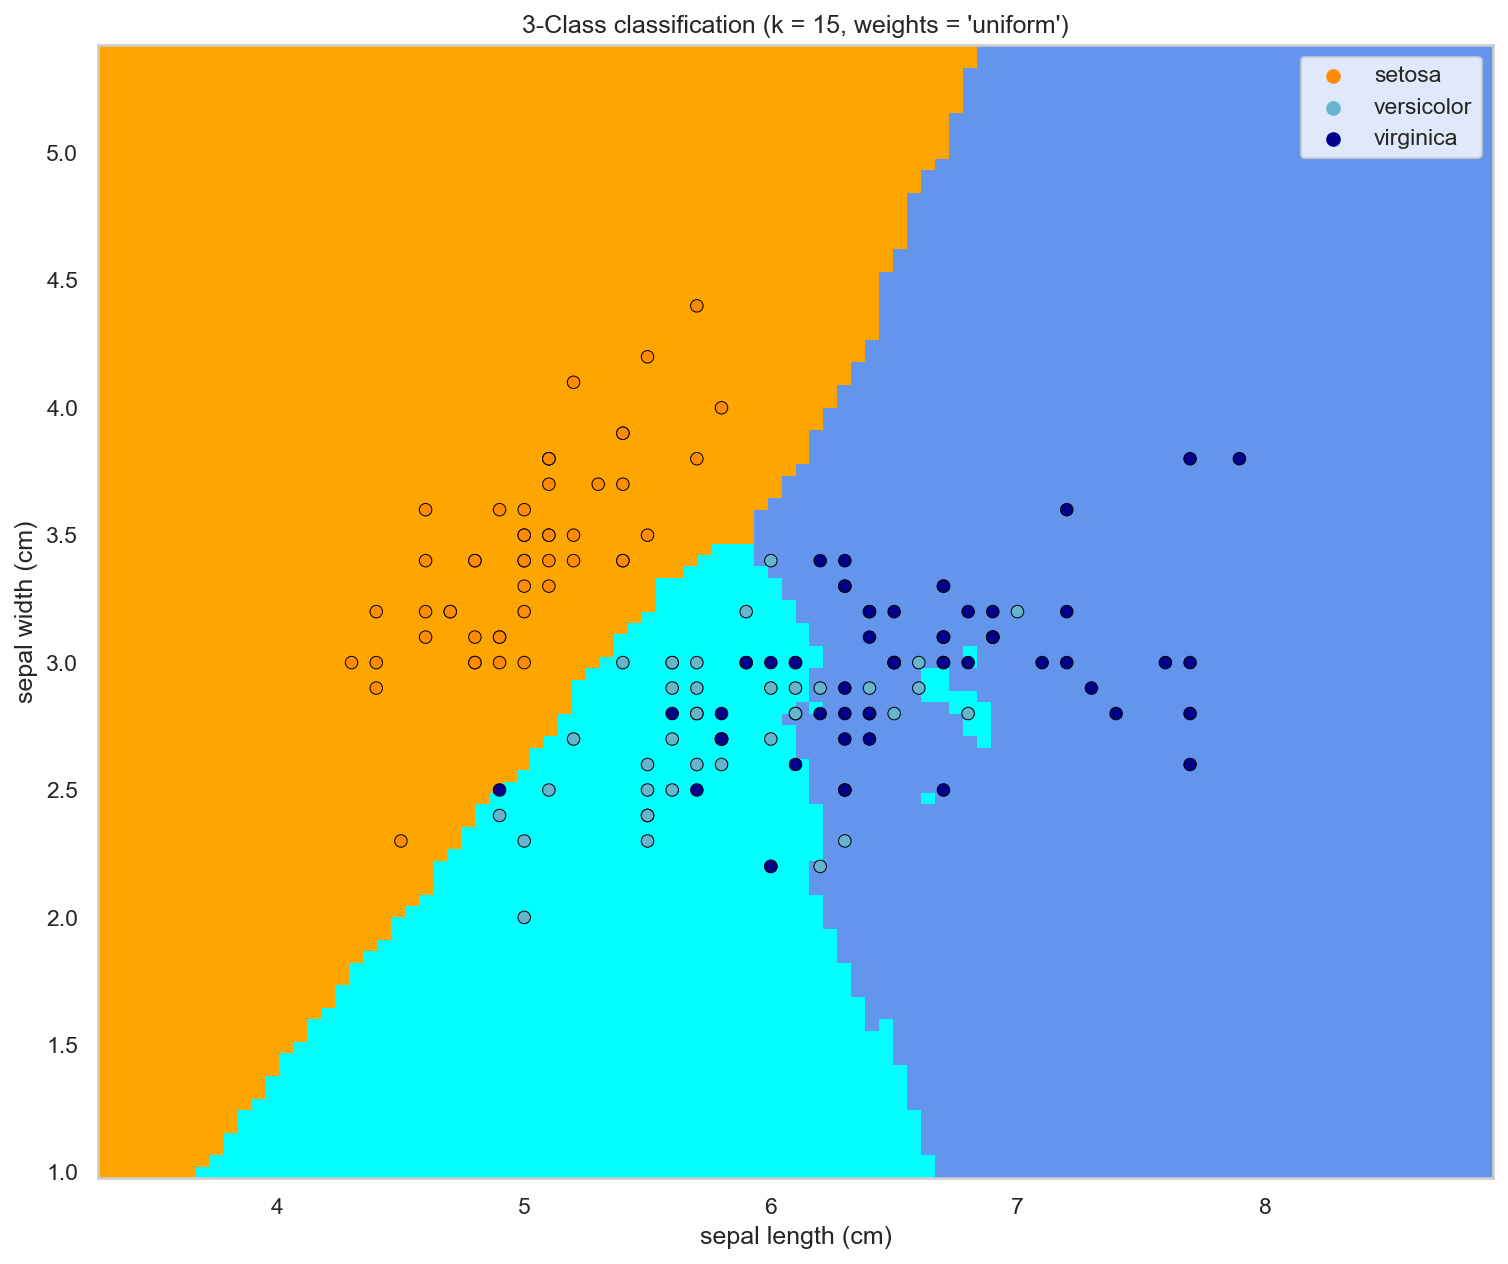

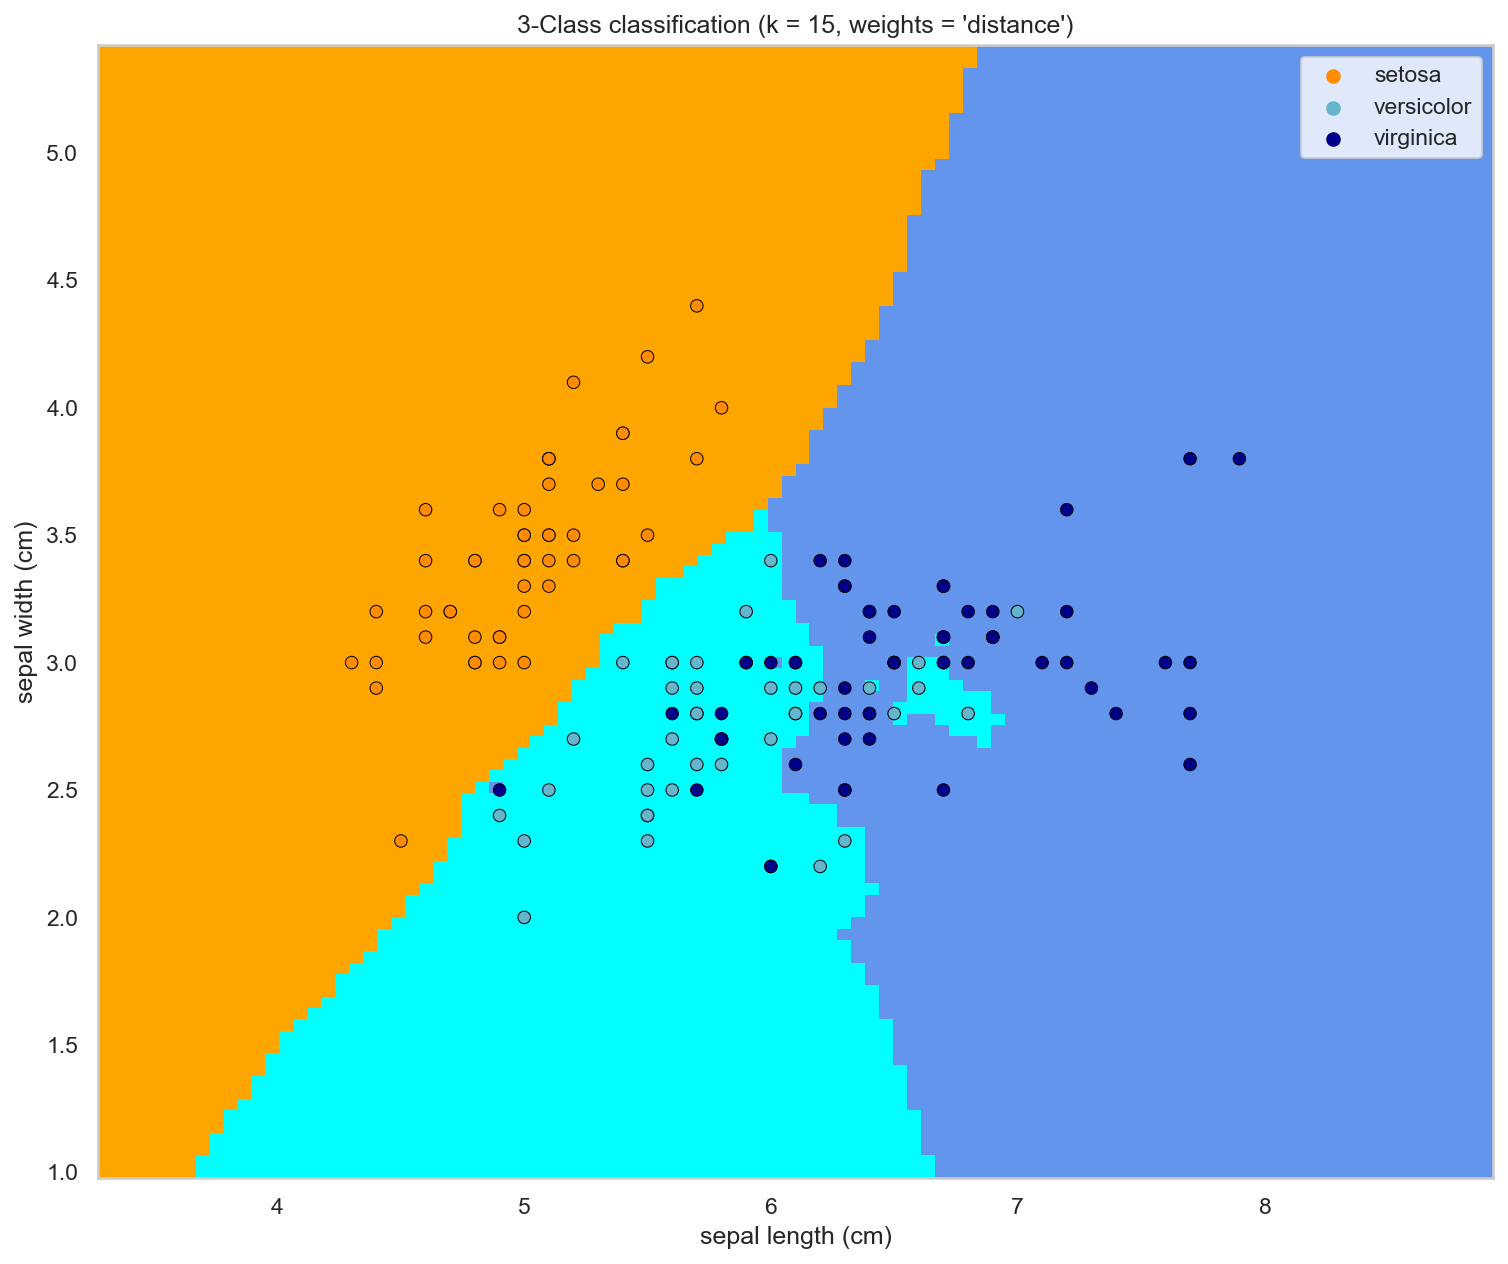

In [13]:

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()

### 2.  Describe the analysis technique you used to appropriately analyze the data. Include screenshots of the intermediate calculations you performed.
*The submission accurately describes the analysis technique used to appropriately analyze the data, and the submission includes accurate screenshots of the intermediate calculations performed.*


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

print(f'k-NN accuracy for test set {knn.score(X_test, y_test)})
      
from sklearn.metrics import classification_report
y_true, y_pred = y_test, knn.predict(X_test)
print(classification_report(y_true, y_pred))

### 3.  Provide the code used to perform the classification analysis from part D2.
*The submission provides the code used to perform the classification analysis from part D2 and the code executes without errors.*


In [ ]:
# provide baseline KNN with defaults to use for model comparison

# Part V: Data Summary and Implications
---

## E.  Summarize your data analysis by doing the following:


### 1.  Explain the accuracy and the area under the curve (AUC) of your classification model.
*The submission logically explains both the accuracy and the AUC of the classification model.*

In [ ]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = cv.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [ ]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = cv.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

### 2.  Discuss the results and implications of your classification analysis.
*The submission adequately discusses both the results and implications of the classification analysis.*

### 3.  Discuss one limitation of your data analysis.

*The submission logically discusses 1 limitation of the data analysis with adequate detail.*

#### 4.  Recommend a course of action for the real-world organizational situation from part A1 based on your results and implications discussed in part E2.
*The submission recommends a reasonable course of action for the real-world organizational situation from part A1 based on the results and implications discussed in part E2.*

# Part VI: Demonstration
---

## F.  Provide a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the programming environment.
*The submission provides a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the programming environment.*

## G.  Web Sources

- https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification
- https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

## H. References